In [1]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt

# A.1

In [2]:
def myfunction(x,mu):         #On crée notre fonction représentant la densité de probabilité des évenements à simuler    
    s = 0.01                  #En particulier, on pose une moyenne et un écart type aléatoire
    
    return (1/0.025)*np.exp(-(x-mu)**2/(2*s**2))   #En n'oubliant pas le facteur de normalisation pour le domaine utilisé plus bas 

In [3]:
x = np.linspace(0,0.2,50, endpoint=True) 

In [4]:
mu = 0.104                                 #On pose une valeur aléatoire de mu
vmyfunction = np.vectorize(myfunction)     #On stocke dans y les valeurs de 50 points de la fonction entre 0 et 0.2
y = vmyfunction(x,mu)

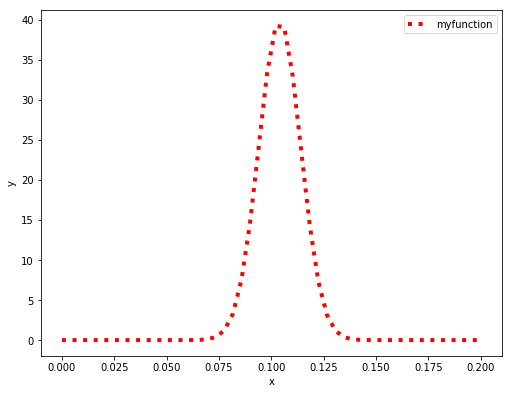

In [5]:
fig = plt.figure(figsize =(8,6))

ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(x,y,'r:', lw=4,label='myfunction')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

# A.2

In [6]:
mc_events = 100000          #On va simuler 100000  évenements 
ymax=np.max(y)              #ymax représente le maximum de la fonction dans le domaine défini

In [7]:
rnd1 = np.random.rand(mc_events)     #random.rand va simuler des nombres aléatoires entre 0 et 1 
rnd2 = np.random.rand(mc_events)

yrnd = ymax*rnd1            #On réarrange les valeurs aléatoires de sorte que yrnd donne des valeurs entre 0 et ymax
xrnd = rnd2*0.200                   #Et xrnd entre 0 et 0.200

In [8]:
yprime = vmyfunction(xrnd,mu)               #On implémente la condition du Hit&Miss
data2 = xrnd[np.where(yrnd < yprime)]       #On stocke les évenements souhaités dans un tableau 

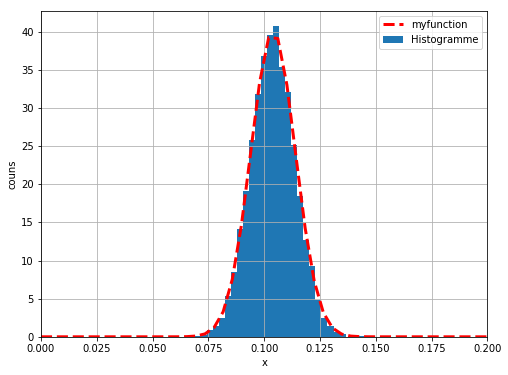

In [9]:
fig2 , ax2=plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data2,bins=30,normed=True, label = 'Histogramme')
ax2.plot(x,y,'r--',lw=3,label='myfunction')
ax2.set_xlabel("x")
ax2.set_ylabel("couns")
ax2.set_xlim(0,0.2)
ax2.legend()
plt.show()

# A.3

In [10]:
hist, binsedges  = np.histogram(data2,bins = 30,normed=True)
binscenters = binsedges[:-1] + np.diff(binsedges)/2.

                                                    #Code nous permettant d'appliquer la méthode des moindres carrés
mu_min = 0.075                                      
mu_max = 0.125

Q = []

tt = np.arange(mu_min, mu_max, 0.0001)

for mu in tt:
    Q.append(np.sum((hist - myfunction(binscenters, mu))**2)) 
        
mu_best = tt[np.where(Q == np.min(Q))]

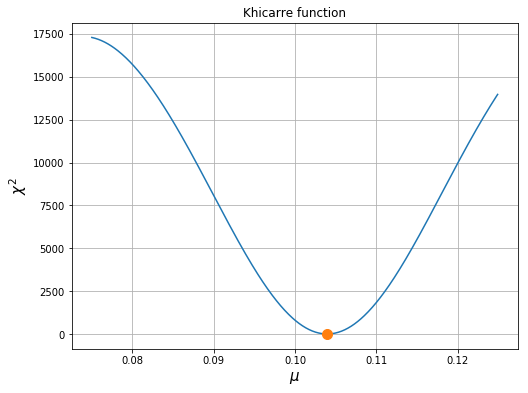

[ 0.1039]


In [11]:
fig3, ax3 = plt.subplots(figsize=(8,6))
plt.grid()
ax3.plot(tt, Q)
ax3.set_xlabel(r"$\mu$ ", fontsize=15)
ax3.set_ylabel("$\chi^2$", fontsize=15)
ax3.plot(mu_best, np.min(Q),'o', ms=10)
plt.title('Khicarre function')
plt.show()
print(mu_best)

# A.4

In [12]:
file = open("cerenkov_his2.dat")    # À modifier selon l'emplacement du fichier
nbins = 0
lines = file.readlines()
hist = []                                                #On importe ici les fichiers des données obtenues 
for line in lines:                                       #On les stocke toutes dans un tableau "hist" 
    line = line.replace('\r\n','')
    line = line.replace('\t','')
    try:
        hist.append(int(line.replace('\n', '')))
        nbins += 1
    except Exception as e:
        print (e)
        
file.close()

invalid literal for int() with base 10: ''


# A.5

In [13]:
def adctocharge(x):                         #Modification des unités ADC vers unités de charges 
    return (0.25*x-10.028)

def convertdata(data):                      #Modification du fichier initial
    hist=[]
    
    l=len(data)
    
    for i in range(1,l-1):
        for j in range(data[i]):
            hist.append(adctocharge((i+i-1)/2))            
            
    return hist

# A.6

In [14]:
data1=convertdata(hist)                 #On emmagasine toutes les données entre un certain intervalle dans un 
data2=[]                                #nouveau tableau data2
for elem in data1:
    if elem<140 and elem>50:
        data2.append(elem)
        

# A.7

In [15]:
def gauss_function1(x,mu):
    s = 38    
    return (1/73)*np.exp(-(x-mu)**2/(2*s**2))  #Nous avons directement mis un facteur de normalisation pour le domaine
    

In [16]:
hist, binsedges  = np.histogram(data2,bins = 75,normed=True)
binscenters = binsedges[:-1] + np.diff(binsedges)/2.                        
                                                        #On applique les méthodes des moindres carrés

mu_min = 60.                                            #sur les fonctions définie ci-dessus et sur nos données coupées 
mu_max = 130.

Q = []

tt = np.arange(mu_min, mu_max, 0.1)

for mu in tt:
    Q.append(np.sum((hist - gauss_function1(binscenters, mu))**2)) 
        
mu_best = tt[np.where(Q == np.min(Q))]

# A.8

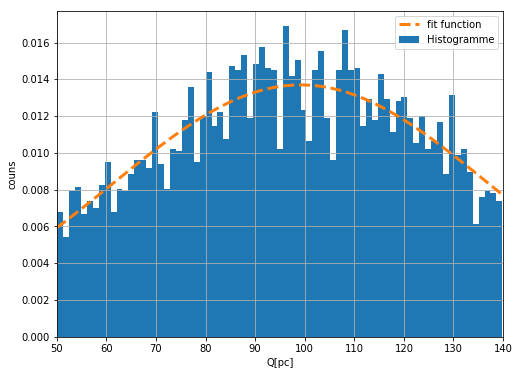

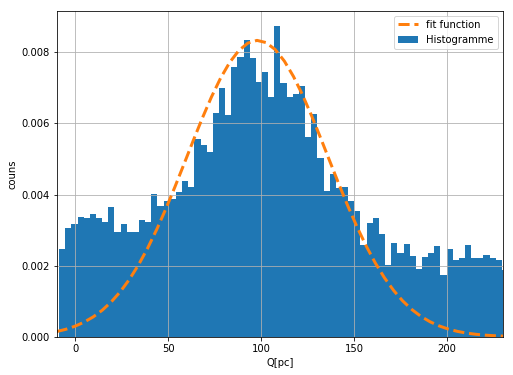

In [17]:
x=np.linspace(50,140)                                   #graphe pour la partie découpée de l'histogramme
y_best=gauss_function1(x,mu_best)
fig2 , ax2=plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data2,bins=75,normed=True, label = 'Histogramme')
ax2.plot(x,y_best,'--',lw=3,label='fit function')
ax2.set_xlabel("Q[pc]")
ax2.set_ylabel("couns")
ax2.set_xlim(50,140)
ax2.legend()
plt.show()


                                                      #On réalise le graphe pour l'histogramme entier
def gauss_function2(x,mu):                            #En définissant donc une nouvelle gaussienne avec une autre...
    s = 38                                            #...normalisation correspondant au domaine.
    return (1/120)*np.exp(-(x-mu)**2/(2*s**2))   

hist, binsedges  = np.histogram(data1,bins = 75,normed=True)
binscenters = binsedges[:-1] + np.diff(binsedges)/2.                        


mu_min = 60
mu_max = 130

Q = []

tt = np.arange(mu_min, mu_max, 0.1)

for mu in tt:
    Q.append(np.sum((hist - gauss_function2(binscenters, mu))**2)) 
        
mu_best = tt[np.where(Q == np.min(Q))]

x1=np.linspace(-10,230)
y1_best=gauss_function2(x1,mu_best)
fig3 , ax3=plt.subplots(figsize=(8,6))
plt.grid()
ax3.hist(data1,bins=75,normed=True, label = 'Histogramme')
ax3.plot(x1,y1_best,'--',lw=3,label='fit function')
ax3.set_xlabel("Q[pc]")
ax3.set_ylabel("couns")
ax3.set_xlim(-10,230)
ax3.legend()
plt.show()

# A.9

In [18]:
data3=[]                               #comme précédemment, on isole les données dans l'intervalle souhaitée
for elem in data1:
    if elem<230 and elem>180:
        data3.append(elem)
        
def gauss_function3(x,mu):
    s = 20    
    return (1/350)*np.exp(-(x-mu)**2/(2*s**2))      #Facteur de normalisation présent

In [19]:
hist, binsedges  = np.histogram(data3,bins = 75,normed=True)
binscenters = binsedges[:-1] + np.diff(binsedges)/2.
                                                
    
                            #On applique les moindres sur la fonction ci-dessus et sur les données

mu_min = 190.
mu_max = 210.

Q = []

tt = np.arange(mu_min, mu_max, 0.1)

for mu in tt:
    Q.append(np.sum((hist - gauss_function3(binscenters, mu))**2)) 
        
mu_best2 = tt[np.where(Q == np.min(Q))]